<a href="https://colab.research.google.com/github/rishitharaj/California-Housing-Project/blob/main/California_Housing_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Assignment Objective:**

The objective of this assignment is to evaluate your understanding of regression techniques in
supervised learning by applying them to a real-world dataset.

**Dataset:**
Use the California Housing dataset available in the sklearn library. This dataset contains
information about various features of houses in California and their respective median prices.

***Key Components to be Fulfilled:***

In [ ]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import warnings
warnings.filterwarnings('ignore')

# For reproducibility
RANDOM_STATE = 42

##**Loading and Preprocessing:**
- Load the California Housing dataset using the fetch_california_housing function from sklearn.
- Convert the dataset into a pandas DataFrame for easier handling. Handle
missing values (if any) and perform necessary feature scaling (e.g.,
standardization).
- Explain the preprocessing steps you performed and justify why they are
necessary for this dataset.

In [ ]:
cal = fetch_california_housing(as_frame=True)
# type: ignore
df = cal.frame.copy()

# Quick peek
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Check missing values
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
# Check distributions & summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


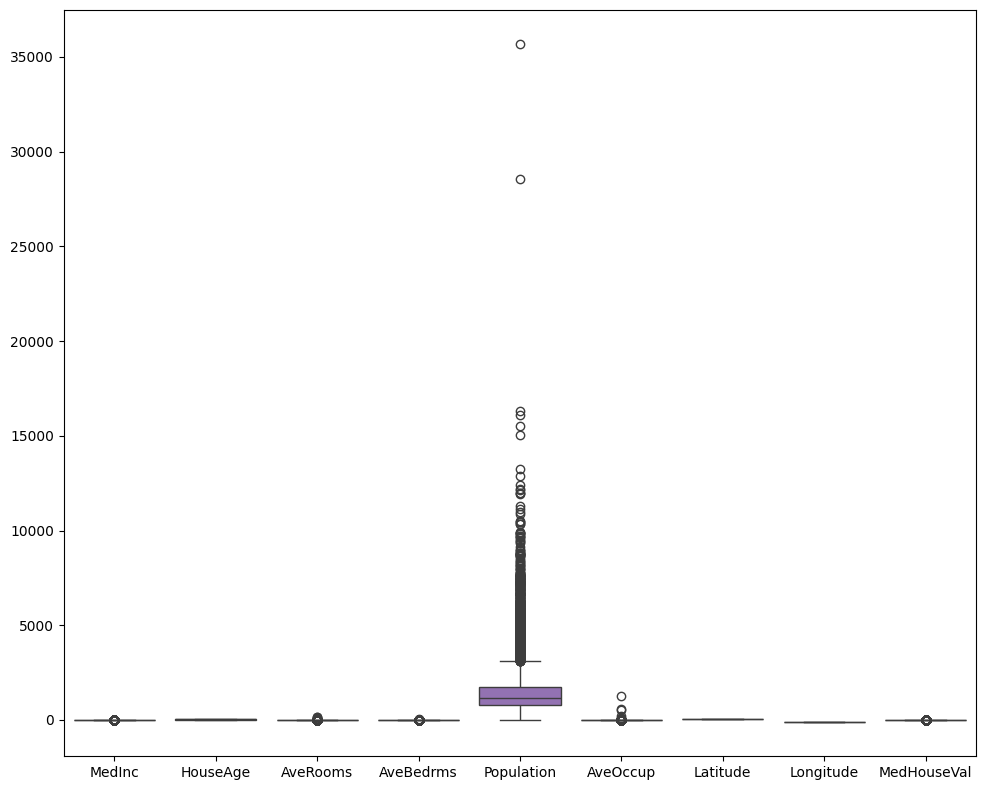

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.tight_layout()

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = {
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'lower': lower, 'upper': upper, 'count_outliers': int(outliers.shape[0])
    }

outlier_summary

{'MedInc': {'Q1': np.float64(2.5633999999999997),
  'Q3': np.float64(4.74325),
  'IQR': np.float64(2.17985),
  'lower': np.float64(-0.7063750000000004),
  'upper': np.float64(8.013024999999999),
  'count_outliers': 681},
 'HouseAge': {'Q1': np.float64(18.0),
  'Q3': np.float64(37.0),
  'IQR': np.float64(19.0),
  'lower': np.float64(-10.5),
  'upper': np.float64(65.5),
  'count_outliers': 0},
 'AveRooms': {'Q1': np.float64(4.440716235896959),
  'Q3': np.float64(6.052380952380952),
  'IQR': np.float64(1.6116647164839932),
  'lower': np.float64(2.023219161170969),
  'upper': np.float64(8.469878027106942),
  'count_outliers': 511},
 'AveBedrms': {'Q1': np.float64(1.006079046038478),
  'Q3': np.float64(1.099526066350711),
  'IQR': np.float64(0.09344702031223284),
  'lower': np.float64(0.8659085155701288),
  'upper': np.float64(1.2396965968190603),
  'count_outliers': 1424},
 'Population': {'Q1': np.float64(787.0),
  'Q3': np.float64(1725.0),
  'IQR': np.float64(938.0),
  'lower': np.float64

In [ ]:
## Handling outliers for linear Models - Linear Reg, SVR

# from scipy.stats.mstats import winsorize

# df_wins = df.copy()
# for col in num_cols:
#     df_wins[col] = winsorize(df[col], limits=[0.01, 0.01])  # caps bottom & top 1%


# #[MedHouseVal] is the target column
# x = df_wins.drop(columns=['MedHouseVal'])
# y = df_wins['MedHouseVal']


In [ ]:
#[MedHouseVal] is the target column
x = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']


**✅ Explanation / Justification:**

Processing steps performed,

- Check null data: The data set doesn't have any null value, so no null value replacement or dropping required
- Check for non-numeric feature - All features are in float, so no encoding required
- Outlier Handling - To see the performance of the model, we will see the performance with and with outlier handled situation.
- Scaling - Will be performed for Linear Reg & SVR Models as these models are sensitive to feature scales.

##**Regression Algorithm Implementation**
Implement the following regression algorithms:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)

For each algorithm: Provide a brief explanation of how it works. Explain why it
might be suitable for this dataset.

In [ ]:
# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=RANDOM_STATE)

In [ ]:
# Linear Regression, used pipeline to perform multiple action.
pipe_lr = Pipeline([
  ("scaler", StandardScaler()), #Standard Scaling used
  ("lr", LinearRegression())
  ])
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=RANDOM_STATE)
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
model_rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=RANDOM_STATE)
model_gb.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [ ]:
# Support Vector Regressor (SVR)
pipe_svr = Pipeline([
("scaler", StandardScaler()),
("svr", SVR(kernel='rbf', C=10.0, epsilon=0.1))
])
pipe_svr.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10.0))])

✅

##**Model Evaluation and Comparison**

Evaluate the performance of each algorithm using the following metrics:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R-squared Score (R2)

Compare the results of all models and identify: The best-performing algorithm
with justification and the worst-performing


In [ ]:
def evaluate_model(name, model, x_test, y_test):
  preds = model.predict(x_test)
  mse = mean_squared_error(y_test, preds)
  mae = mean_absolute_error(y_test, preds)
  r2 = r2_score(y_test, preds)
  return {"model": name, "MSE": mse, "MAE": mae, "R2": r2}


results = []


results.append(evaluate_model('LinearRegression', pipe_lr, x_test, y_test))
results.append(evaluate_model('DecisionTree', model_dt, x_test, y_test))
results.append(evaluate_model('RandomForest', model_rf, x_test, y_test))
results.append(evaluate_model('GradientBoosting', model_gb, x_test, y_test))
results.append(evaluate_model('SVR', pipe_svr, x_test, y_test))


results_df = pd.DataFrame(results).set_index('model')
results_df

,MSE,MAE,R2
model,,,
LinearRegression,0.555892,0.533200,0.575788
DecisionTree,0.495235,0.454679,0.622076
RandomForest,0.255368,0.327543,0.805123
GradientBoosting,0.261498,0.348343,0.800445
SVR,0.323697,0.377445,0.752980


In [ ]:
# Sort by MSE ascending
results_df.sort_values('MSE')

,MSE,MAE,R2
model,,,
RandomForest,0.255368,0.327543,0.805123
GradientBoosting,0.261498,0.348343,0.800445
SVR,0.323697,0.377445,0.752980
DecisionTree,0.495235,0.454679,0.622076
LinearRegression,0.555892,0.533200,0.575788


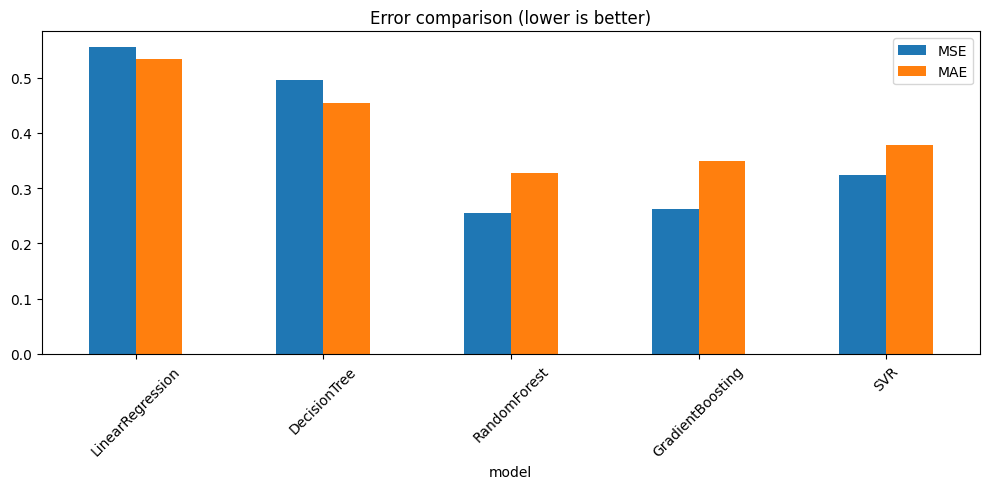

In [ ]:
# Bar charts for metrics
results_df[['MSE','MAE']].plot(kind='bar', figsize=(10,5), rot=45)
plt.title('Error comparison (lower is better)')
plt.tight_layout()



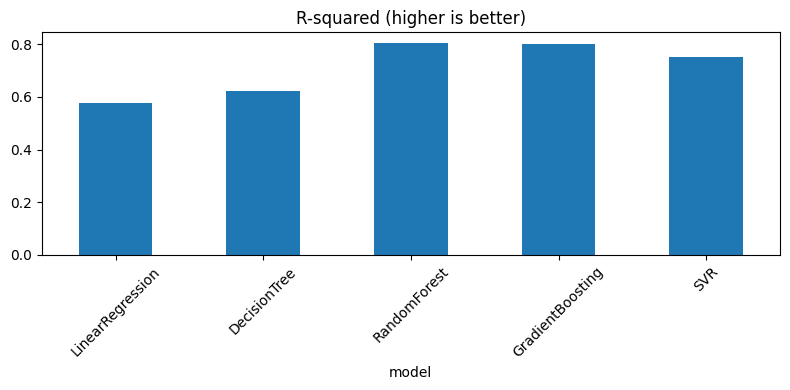

In [ ]:
# R2 plot
results_df['R2'].plot(kind='bar', figsize=(8,4), rot=45)
plt.title('R-squared (higher is better)')
plt.tight_layout()

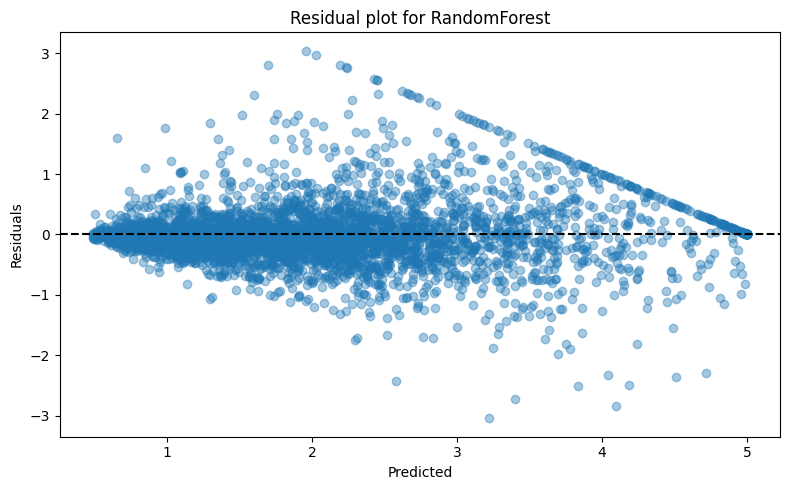

In [ ]:
# best_model_name = results_df['MSE'].idxmin()
# best_model = {
# 'LinearRegression': pipe_lr,
# 'DecisionTree': model_dt,
# 'RandomForest': model_rf,
# 'GradientBoosting': model_gb,
# 'SVR': pipe_svr
# }[best_model_name]


# preds = best_model.predict(x_test)
# residuals = y_test - preds


# plt.figure(figsize=(8,5))
# plt.scatter(preds, residuals, alpha=0.4)
# plt.axhline(0, color='black', linestyle='--')
# plt.xlabel('Predicted')
# plt.ylabel('Residuals')
# plt.title(f'Residual plot for {best_model_name}')
# plt.tight_layout()

*Timely Submission*(1 mark):
- Submit your code in a Jupyter Notebook format via a GitHub link.
- Ensure that your code is well-documented and explanations are clear and
concise.
- Submission Guidelines: Use Python and Jupyter Notebook for implementation.
Submit the GitHub repository link containing the code and all necessary files.
Ensure proper documentation, including code comments and markdown
explanations.